## Exploring the Egypt's Wheat imports and exports

A country's economy depends, sometimes heavily, on its exports and imports. The United Nations Comtrade database provides data on global trade. It will be used to analyse the Egypt's imports and exports of Wheat in 2018:


In [1]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

import pandas as pd
%matplotlib inline

In [2]:
LOCATION = 'Wheat.csv'

On reading in the data, the commodity code has to be read as a string, to not lose the leading zero.

In [3]:
wheat = pd.read_csv(LOCATION, dtype={'Commodity Code':str})
wheat.head()

,Classification,Year,Period,Period Desc.,Aggregate Level,Is Leaf Code,Trade Flow Code,Trade Flow,Reporter Code,Reporter,...,Qty,Alt Qty Unit Code,Alt Qty Unit,Alt Qty,Netweight (kg),Gross weight (kg),Trade Value (US$),CIF Trade Value (US$),FOB Trade Value (US$),Flag
0,HS,2018,201801,January 2018,6,1,1,Imports,818,Egypt,...,NaN,NaN,NaN,NaN,NaN,NaN,245802930,NaN,NaN,0
1,HS,2018,201801,January 2018,6,1,1,Imports,818,Egypt,...,NaN,NaN,NaN,NaN,NaN,NaN,14346108,NaN,NaN,0
2,HS,2018,201801,January 2018,6,1,1,Imports,818,Egypt,...,NaN,NaN,NaN,NaN,NaN,NaN,3109606,NaN,NaN,0
3,HS,2018,201801,January 2018,6,1,1,Imports,818,Egypt,...,NaN,NaN,NaN,NaN,NaN,NaN,213776521,NaN,NaN,0
4,HS,2018,201801,January 2018,6,1,1,Imports,818,Egypt,...,NaN,NaN,NaN,NaN,NaN,NaN,14570695,NaN,NaN,0


In [28]:
MONTH = 'Period'
PARTNER = 'Partner'
FLOW = 'Trade Flow'
VALUE = 'Trade Value (US$)'
headings = [MONTH, PARTNER, FLOW, VALUE]
wheat = wheat[headings]
wheat.head()

,Period,Partner,Trade Flow,Trade Value (US$)
1,201801,Belarus,Imports,14346108
2,201801,Poland,Imports,3109606
3,201801,Russian Federation,Imports,213776521
4,201801,Ukraine,Imports,14570695
6,201802,Romania,Imports,14471074


In [16]:
wheat = wheat[wheat[PARTNER] != 'World']
wheat.head()

,Period,Partner,Trade Flow,Trade Value (US$)
1,201801,Belarus,Imports,14346108
2,201801,Poland,Imports,3109606
3,201801,Russian Federation,Imports,213776521
4,201801,Ukraine,Imports,14570695
6,201802,Romania,Imports,14471074


In [17]:
grouped = wheat.groupby([FLOW])
grouped[VALUE].aggregate(sum)

Trade Flow
Imports    2804299251
Name: Trade Value (US$), dtype: int64

`As it shown, Egypt does not exported wheat or other seeds, Just exported them with budget exceeded 28,042,99,251`

In [18]:
imports = wheat[wheat[FLOW] == 'Imports']
grouped = imports.groupby([PARTNER])
print('Egypt imports from', len(grouped), 'countries.')
print('The 5 biggest exporters to the Egypt are:')
totalImports = grouped[VALUE].aggregate(sum).sort_values(inplace=False,ascending=False)
totalImports.head()

Egypt imports from 10 countries.
The 5 biggest exporters to the Egypt are:


Partner
Russian Federation    2065803090
Ukraine                340157563
Romania                265009592
Australia               55748298
Poland                  29208671
Name: Trade Value (US$), dtype: int64

<AxesSubplot:ylabel='Partner'>

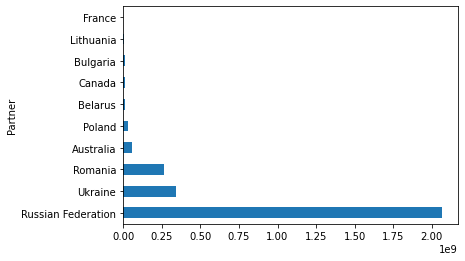

In [19]:
totalImports.head(10).plot(kind='barh')

`Apart from Australia, almost all the Egyptian import for the wheat are coming from Russia and other Soviet countries.`

## Bi-directional trade

'Which countries does Egypt import from?', a pivot table is used to list the total export and import value for each country. 

In [21]:
countries = pd.pivot_table(wheat, index=[PARTNER], columns=[FLOW], 
                        values=VALUE, aggfunc=sum)
countries.head()

Trade Flow,Imports
Partner,
Australia,55748298
Belarus,14346108
Bulgaria,12205498
Canada,13805522
France,13990


In [22]:
countries.dropna()

Trade Flow,Imports
Partner,
Australia,55748298
Belarus,14346108
Bulgaria,12205498
Canada,13805522
France,13990
Lithuania,8000919
Poland,29208671
Romania,265009592
Russian Federation,2065803090
